## Problem Statement - Vehicle Insurance

The Vehicle Insurance business is a multi-billion dollar industry. Every year millions and millions of premiums are paid, and a huge amount of claims also pile up. 

You have to step into the shoes of a data scientist who is building models to help an insurance company understand which claims are worth rejecting and the claims which should be accepted for reimbursement. 
You are given a rich dataset consisting of thousands of rows of past records, which you can use to learn more about your customers’ behaviours. For example, you are supposed to create an ML model to look at a case of an insurance claim and decide whether to reject or accept it. 


Columns: ['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE']

Learn and predict the OUTCOME variable.

### Create an ML model to look at a case of an insurance claim and decide whether to reject or accept it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('vehicle_train.csv')
test = pd.read_csv('vehicle_test.csv')
submission = pd.read_csv('vehicle_submission.csv')

In [3]:
# We want to display all the columns:
pd.set_option('display.max_columns',50)
train.head(3)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000,0,0,0,0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000,0,0,0,1,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238,12000,0,0,0,1,Sedan


In [4]:
combined = pd.concat([train,test], ignore_index=True)
combined.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000,0,0,0,1.0,HatchBack


In [5]:
train.shape, test.shape, combined.shape
# Our data has 1,05,000 rows and 18 columns

((87285, 18), (17715, 17), (105000, 18))

In [6]:
# Lets look at the info
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  int64  
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  int64  
 10  CHILDREN             105000 non-null  int64  
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  int64  
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [7]:
combined.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [8]:
# Numerical columns
num_cols = combined.select_dtypes(include=np.number).columns
num_cols

Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [9]:
# Categorical columns
cat_cols = combined.select_dtypes(include='object').columns
cat_cols

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [10]:
combined.head(1)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.63805,0,after 2015,0,0,37379,11000,0,0,0,0.0,Sports Car


In [11]:
# All objects below

In [12]:
combined.DRIVING_EXPERIENCE.unique()

array(['20-29y', '30y+', '0-9y', '10-19y'], dtype=object)

In [13]:
combined.EDUCATION.unique()

array(['university', 'high school', 'none'], dtype=object)

In [14]:
combined.INCOME.unique()

array(['middle class', 'upper class', 'working class', 'poverty'],
      dtype=object)

In [15]:
combined.VEHICLE_OWNERSHIP.unique(), combined.VEHICLE_YEAR.unique()

(array([0, 1], dtype=int64),
 array(['after 2015', 'before 2015'], dtype=object))

In [16]:
combined.MARRIED.unique(), combined.CHILDREN.unique()

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

In [17]:
combined.POSTAL_CODE.nunique()

10937

In [18]:
combined.SPEEDING_VIOLATIONS.unique()

array([ 0,  1,  4, 11,  3,  2,  6,  5, 13,  7, 10,  8, 12, 16, 14,  9, 15,
       17, 18, 20, 19], dtype=int64)

In [19]:
combined.DUIS.unique(), combined.PAST_ACCIDENTS.unique()

(array([0, 3, 1, 2, 4, 5, 6], dtype=int64),
 array([ 0,  1,  2,  4,  5,  7,  6,  9,  3,  8, 13, 10, 12, 15, 11, 14],
       dtype=int64))

In [20]:
combined.TYPE_OF_VEHICLE.unique()

array(['Sports Car', 'HatchBack', 'Sedan', 'SUV'], dtype=object)

In [21]:
# Target variable
combined.OUTCOME.unique()

# Contains nan values

array([ 0.,  1., nan])

In [22]:
# Lets check for missing values
combined.isnull().sum()

# There seem to be no missing values in the dataset

ID                         0
AGE                        0
GENDER                     0
DRIVING_EXPERIENCE         0
EDUCATION                  0
INCOME                     0
CREDIT_SCORE               0
VEHICLE_OWNERSHIP          0
VEHICLE_YEAR               0
MARRIED                    0
CHILDREN                   0
POSTAL_CODE                0
ANNUAL_MILEAGE             0
SPEEDING_VIOLATIONS        0
DUIS                       0
PAST_ACCIDENTS             0
OUTCOME                17715
TYPE_OF_VEHICLE            0
dtype: int64

In [23]:
combined.OUTCOME.mode()

0    0.0
Name: OUTCOME, dtype: float64

<AxesSubplot:xlabel='OUTCOME', ylabel='count'>

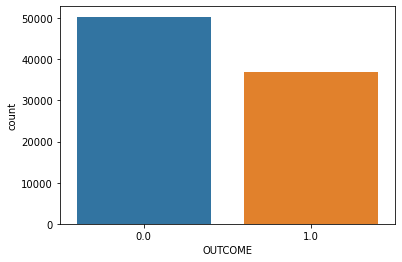

In [24]:
sns.countplot(combined.OUTCOME)

In [25]:
combined.OUTCOME.unique(), combined.OUTCOME.value_counts()

(array([ 0.,  1., nan]),
 0.0    50367
 1.0    36918
 Name: OUTCOME, dtype: int64)

In [26]:
combined.replace(to_replace='nan', value=0, inplace=True)

In [27]:
combined.OUTCOME.unique()

array([ 0.,  1., nan])

In [28]:
# Lets see the 5 point summary
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,105000.0,394931.295905,279694.106053,101.00000,156351.750000,354679.500000,598602.250000,999976.000000
CREDIT_SCORE,105000.0,0.602173,0.138045,0.06688,0.514876,0.601112,0.703216,0.954075
VEHICLE_OWNERSHIP,105000.0,0.827038,0.378216,0.00000,1.000000,1.000000,1.000000,1.000000
MARRIED,105000.0,0.584143,0.492871,0.00000,0.000000,1.000000,1.000000,1.000000
CHILDREN,105000.0,0.520000,0.499602,0.00000,0.000000,1.000000,1.000000,1.000000
POSTAL_CODE,105000.0,18045.439267,16709.040449,10238.00000,10238.000000,10238.000000,22957.750000,92101.000000
ANNUAL_MILEAGE,105000.0,11061.228571,2972.355482,2000.00000,9000.000000,11000.000000,13000.000000,21000.000000
SPEEDING_VIOLATIONS,105000.0,0.675676,1.383678,0.00000,0.000000,0.000000,1.000000,20.000000
DUIS,105000.0,0.129733,0.589714,0.00000,0.000000,0.000000,0.000000,6.000000
PAST_ACCIDENTS,105000.0,0.549314,1.402809,0.00000,0.000000,0.000000,0.000000,15.000000


## Univariate Analysis

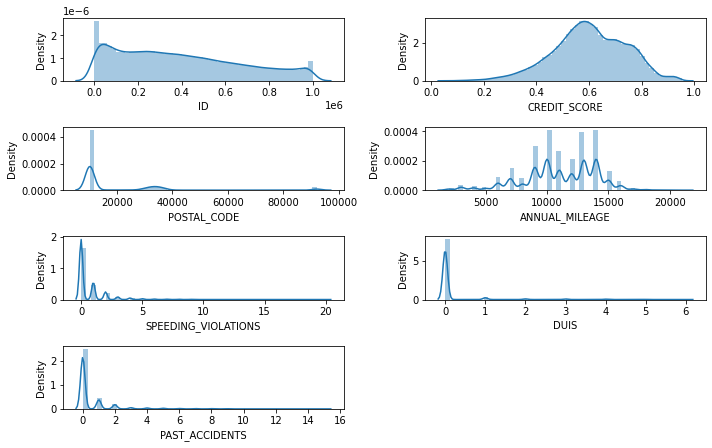

In [29]:
# visualizing numerical columns through a distplot
num_cols = [ 'ID', 'CREDIT_SCORE', 
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS']
plt.figure(figsize=(10,15))
t=1

for i in num_cols:
    plt.subplot(10,2,t)
    sns.distplot(combined[i])
    t+=1
plt.tight_layout()
plt.show()

# We can see that the data is highly skewed, we need to reduce the skewness

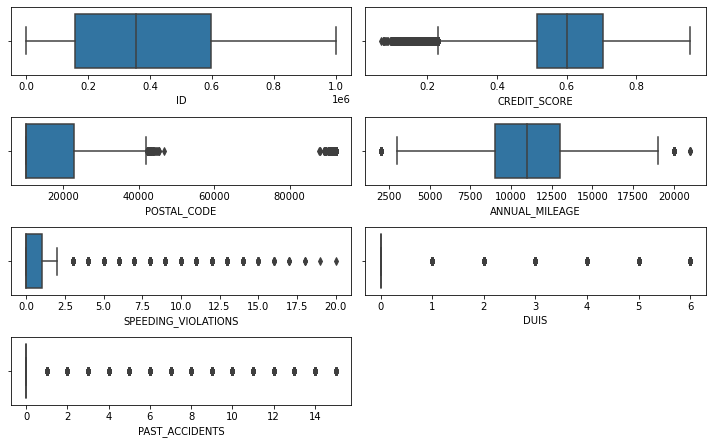

In [30]:
# visualizing numerical columns through a boxplot for the detection of outliers
num_cols = [ 'ID', 'CREDIT_SCORE', 
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS']
plt.figure(figsize=(10,15))
t=1

for i in num_cols:
    plt.subplot(10,2,t)
    sns.boxplot(combined[i])
    t+=1
plt.tight_layout()
plt.show()

# We can see that the data has a lot of outliers, we need to reduce them

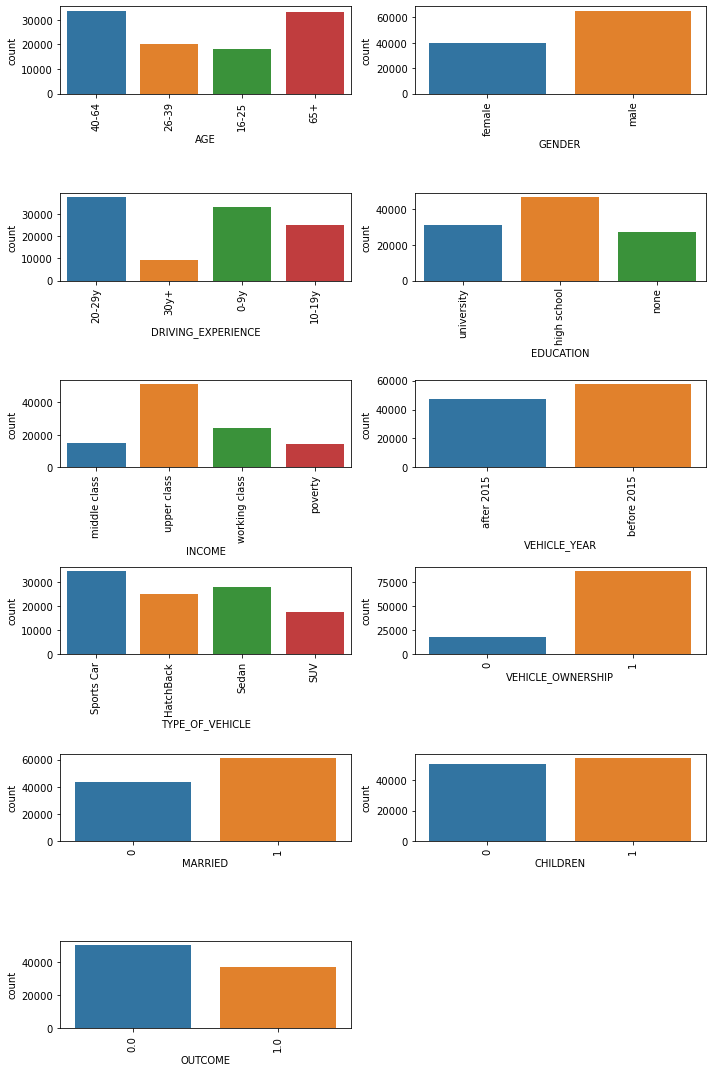

In [31]:
# visualizing categorical columns through a countplot

cat_cols = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'TYPE_OF_VEHICLE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'OUTCOME']
plt.figure(figsize=(10,15))
t=1
for i in cat_cols:
    plt.subplot(6,2,t)
    sns.countplot(combined[i])
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

## Bivariate analysis

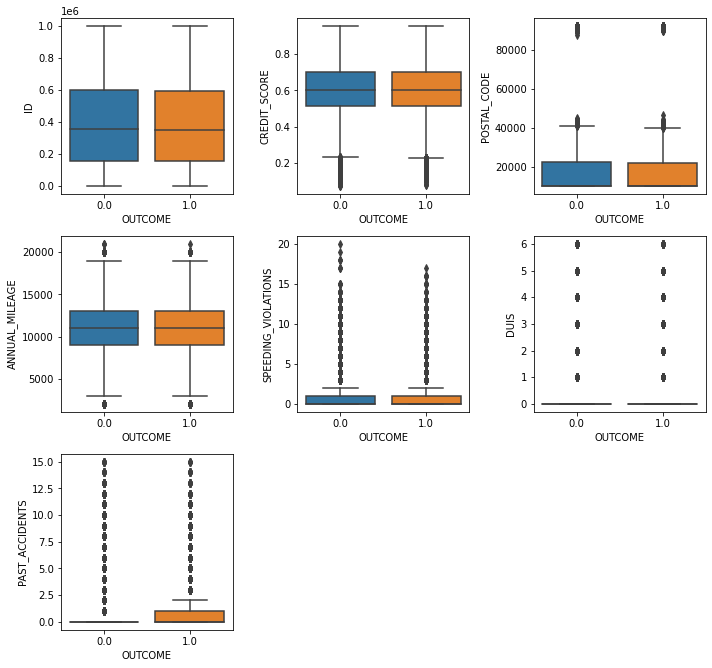

In [32]:
num_cols = [ 'ID', 'CREDIT_SCORE', 
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS']

plt.figure(figsize=(10,15))
t=1
for i in num_cols:
    plt.subplot(5,3,t)
    sns.boxplot(combined.OUTCOME,combined[i])
    t+=1
plt.tight_layout()
plt.show()
    

In [33]:
import scipy.stats as stats

In [34]:
num_cols

['ID',
 'CREDIT_SCORE',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

In [35]:
nums = ['CREDIT_SCORE',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE']

In [36]:
# To see the imp. features
# Apply the statistical test

# Two sample independent Ttest
# Ho: features have no effect on the tgt or viveversa
# H1: features have effect on the tgt or viveversa


imp_feats=[]

for i in nums:
    zero=combined.loc[combined.OUTCOME==0,i]
    one=combined.loc[combined.OUTCOME==1,i]
    teststats,pvalue=stats.ttest_ind(zero,one,alternative="two-sided")
    if pvalue<0.05:
        imp_feats.append(i)
print(imp_feats)

# It shows there no imp feature amongst the 3 numerical columns as such, therefore the list is empty.

[]


In [37]:
# for seeing the imp features through chi2 test

# Cat vs Tgt

cat_feats=[]

for i in cat_cols:
    tbl = pd.crosstab(combined.loc[:,i],combined.OUTCOME)
    teststats, pvalue, dof, exp_freq = stats.chi2_contingency(tbl)
    if pvalue<0.05:
        cat_feats.append(i)
        
print(cat_feats) 

['GENDER', 'DRIVING_EXPERIENCE', 'TYPE_OF_VEHICLE', 'OUTCOME']


In [38]:
# Important features
cat_feats=[]
for i in num_cols:
    tbl=pd.crosstab(combined[i],combined.OUTCOME)
    teststats,pvalue,dof,exp_freq=stats.chi2_contingency(tbl)
    
    if pvalue<0.05:
        cat_feats.append(i)
print(cat_feats)

['ANNUAL_MILEAGE']


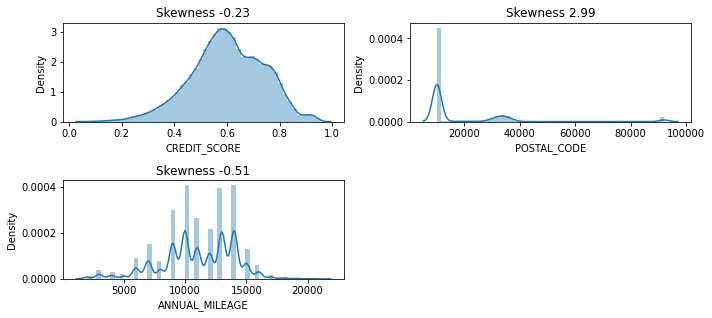

In [39]:
plt.figure(figsize=(10,15))

num_cols = [ 'CREDIT_SCORE', 
       'POSTAL_CODE', 'ANNUAL_MILEAGE']
t=1
for i in num_cols:
    plt.subplot(7,2,t)
    sns.distplot(combined[i])
    plt.title('Skewness %.2f'%combined[i].skew())
    t+=1
plt.tight_layout()
plt.show()

# drop id

## Treatment of outliers

In [40]:
combined['CREDIT_SCORE'] = stats.yeojohnson(pd.DataFrame(combined['CREDIT_SCORE']))[0].reshape(combined.shape[0])

In [41]:
combined['POSTAL_CODE'] = stats.yeojohnson(pd.DataFrame(combined['POSTAL_CODE']))[0].reshape(combined.shape[0])

In [42]:
combined['ANNUAL_MILEAGE'] = stats.yeojohnson(pd.DataFrame(combined['ANNUAL_MILEAGE']))[0].reshape(combined.shape[0])

In [43]:
combined.skew()

ID                     0.448392
CREDIT_SCORE          -0.010415
VEHICLE_OWNERSHIP     -1.729404
MARRIED               -0.341446
CHILDREN              -0.080065
POSTAL_CODE            0.000000
ANNUAL_MILEAGE        -0.090756
SPEEDING_VIOLATIONS    3.899817
DUIS                   5.608688
PAST_ACCIDENTS         4.345520
OUTCOME                0.311893
dtype: float64

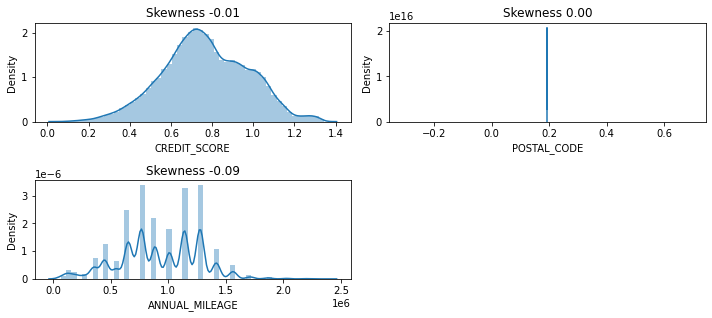

In [45]:
# Lets visualize Histogram again

plt.figure(figsize=(10,15))

num_cols = [ 'CREDIT_SCORE', 
       'POSTAL_CODE', 'ANNUAL_MILEAGE']
t=1
for i in num_cols:
    plt.subplot(7,2,t)
    sns.distplot(combined[i])
    plt.title('Skewness %.2f'%combined[i].skew())
    t+=1
plt.tight_layout()
plt.show()

# We can see that the data is close to normal and the skewness is reduced.

<AxesSubplot:>

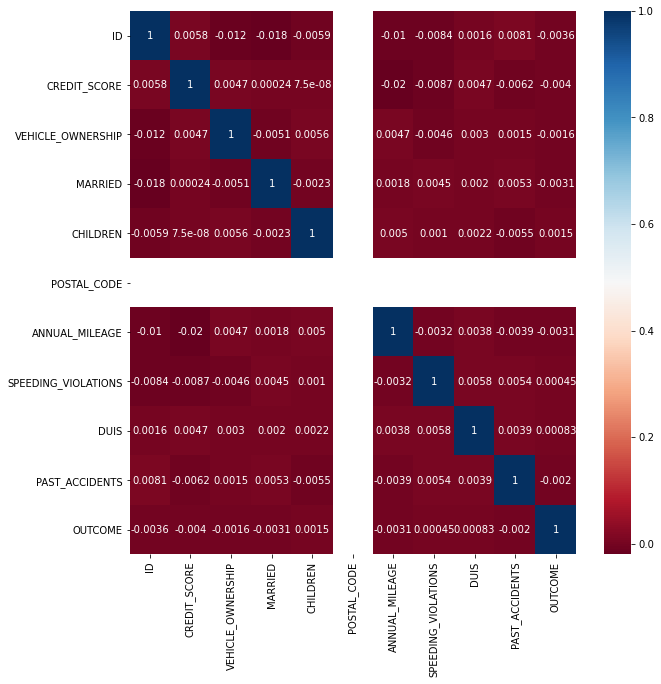

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(combined.corr(), annot=True, cmap='RdBu')

## Feature Engineering

In [47]:
combined.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.813754,0,after 2015,0,0,0.193597,885026.615898,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.573912,1,before 2015,1,0,0.193597,652875.312817,0,0,0,1.0,HatchBack


In [48]:
# Total number of violations done by a person
combined['TOT_DRIVING_VIOLATIONS'] = combined.SPEEDING_VIOLATIONS + combined.PAST_ACCIDENTS + combined.DUIS

In [73]:
# Mileage wise violations
combined['VIOLATION_PER_MILEAGE'] = (combined['TOT_DRIVING_VIOLATIONS'])/combined['ANNUAL_MILEAGE']

In [74]:
combined.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE,TOT_DRIVING_VIOLATIONS,VIOLATION_PER_MILEAGE
0,816393,40-64,female,20-29y,university,middle class,0.813754,0,1,0,0,0.193597,8.850266e+05,0,0,0,0.0,Sports Car,0,0.000000e+00
1,251762,26-39,male,20-29y,high school,middle class,0.573912,1,0,1,0,0.193597,6.528753e+05,0,0,0,1.0,HatchBack,0,0.000000e+00
2,481952,40-64,male,20-29y,none,middle class,1.142449,1,0,1,1,0.193597,1.009828e+06,0,0,0,1.0,Sedan,0,0.000000e+00
3,3506,40-64,male,20-29y,high school,upper class,0.883317,1,0,0,1,0.193597,3.530795e+05,1,0,0,1.0,Sedan,1,2.832223e-06
4,498013,40-64,female,20-29y,none,working class,0.713767,1,1,1,1,0.193597,1.416361e+06,0,0,1,0.0,Sedan,1,7.060349e-07


In [75]:
zero=combined.loc[combined.OUTCOME==0,'TOT_DRIVING_VIOLATIONS']
one=combined.loc[combined.OUTCOME==1,'TOT_DRIVING_VIOLATIONS']
stats.ttest_ind(zero,one)

Ttest_indResult(statistic=0.2465589574516125, pvalue=0.8052501510328559)

In [50]:
combined.DRIVING_EXPERIENCE.str.split('y',expand=True)

,0,1
0,20-29,
1,20-29,
2,20-29,
3,20-29,
4,20-29,
...,...,...
104995,0-9,
104996,0-9,
104997,10-19,
104998,20-29,


In [51]:
combined.VEHICLE_YEAR.str.split('before',expand=True)

,0,1
0,after 2015,None
1,,2015
2,,2015
3,,2015
4,after 2015,None
...,...,...
104995,,2015
104996,after 2015,None
104997,after 2015,None
104998,,2015


In [52]:
combined.VEHICLE_YEAR.str.split('after',expand=True)

,0,1
0,,2015
1,before 2015,None
2,before 2015,None
3,before 2015,None
4,,2015
...,...,...
104995,before 2015,None
104996,,2015
104997,,2015
104998,before 2015,None


In [53]:
combined.ANNUAL_MILEAGE.mean()

918746.5664512074

In [54]:
combined.ANNUAL_MILEAGE.max()

2358980.456400292

In [55]:
combined.CREDIT_SCORE.unique()

array([0.81375406, 0.57391177, 1.14244859, ..., 0.55454175, 0.58497566,
       0.56402307])

In [56]:
combined.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE,TOT_DRIVING_VIOLATIONS
0,816393,40-64,female,20-29y,university,middle class,0.813754,0,after 2015,0,0,0.193597,885026.615898,0,0,0,0.0,Sports Car,0
1,251762,26-39,male,20-29y,high school,middle class,0.573912,1,before 2015,1,0,0.193597,652875.312817,0,0,0,1.0,HatchBack,0


In [57]:
combined.VEHICLE_YEAR.unique()

array(['after 2015', 'before 2015'], dtype=object)

In [58]:
combined.VEHICLE_YEAR = np.where(combined.VEHICLE_YEAR=='after 2015',1,0)

In [63]:
combined.head(1)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE,TOT_DRIVING_VIOLATIONS
0,816393,40-64,female,20-29y,university,middle class,0.813754,0,1,0,0,0.193597,885026.615898,0,0,0,0.0,Sports Car,0


In [64]:
combined.DRIVING_EXPERIENCE.unique()

array(['20-29y', '30y+', '0-9y', '10-19y'], dtype=object)

In [71]:
combined.DRIVING_EXPERIENCE.str.split('y',expand=True)

,0,1
0,20-29,
1,20-29,
2,20-29,
3,20-29,
4,20-29,
...,...,...
104995,0-9,
104996,0-9,
104997,10-19,
104998,20-29,


In [76]:
#np.where(combined.DRIVING_EXPERIENCE==['0-9y'],'less_exp','more_exp')

In [101]:
#def drive(x):
 #   for i in combined.DRIVING_EXPERIENCE:

## Encoding

In [86]:
# Now, lets make dummies of the remaining columns
combined = pd.get_dummies(combined, drop_first=True)

In [87]:
combined.head(2)

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TOT_DRIVING_VIOLATIONS,VIOLATION_PER_MILEAGE,AGE_26-39,AGE_40-64,AGE_65+,GENDER_male,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,816393,0.227357,0,1,0,0,2.775558e-17,-0.095232,0,0,0,0.0,0,-0.413211,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,251762,-0.929130,1,0,1,0,2.775558e-17,-0.760618,0,0,0,1.0,0,-0.413211,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0


## Train Test Split

In [88]:
# splitting the data in newtrain,newtest

newtrain = combined.loc[0:train.shape[0]-1,]
newtest = combined.loc[train.shape[0]:, ]

In [89]:
# shape of the train,newtrain,newtest,test

train.shape, newtrain.shape, newtest.shape, test.shape

((87285, 18), (87285, 29), (17715, 29), (17715, 17))

In [90]:
# drop the target variable from train test

X = newtrain.drop("OUTCOME",axis=1)
newtest = newtest.drop("OUTCOME",axis=1)

y = newtrain.OUTCOME

## Scaling

In [91]:
# lets do scaling on numerical columns
scale_cols = ["CREDIT_SCORE","POSTAL_CODE","ANNUAL_MILEAGE","VIOLATION_PER_MILEAGE","SPEEDING_VIOLATIONS",
       "DUIS","PAST_ACCIDENTS","TOT_DRIVING_VIOLATIONS"]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

for i in scale_cols:
    newtrain.loc[:,i] = sc.fit_transform(pd.DataFrame(newtrain.loc[:,i]))
    newtest.loc[:,i] = sc.transform(pd.DataFrame(newtest.loc[:,i]))

In [92]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Resampling using SMOTE

In [93]:
# Resmaple the data using smote

smotex,smotey=smote.fit_resample(X,y)

In [94]:
# Lets check the data again
combined.head(2)

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TOT_DRIVING_VIOLATIONS,VIOLATION_PER_MILEAGE,AGE_26-39,AGE_40-64,AGE_65+,GENDER_male,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,816393,0.227357,0,1,0,0,0.0,-0.095232,0,0,0,0.0,0,-0.413211,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,251762,-0.929130,1,0,1,0,0.0,-0.760618,0,0,0,1.0,0,-0.413211,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [95]:
# importing the random forest
from sklearn.ensemble import RandomForestClassifier

In [96]:
# Applying the Random forest after applying the smote

rf = RandomForestClassifier(criterion="entropy")

pred_smote = rf.fit(smotex,smotey).predict(newtest)

In [99]:
# Lets do submission

submission["OUTCOME"] = pred_smote
submission.to_csv("RandomforestAfterSmotemodel.csv",index=False)  # 0.5587200 my rank-5th

In [100]:
cd

C:\Users\Astha Aggarwal
